In [96]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.io import loadmat

In [5]:
%matplotlib inline

In [6]:
data1 = loadmat("machine-learning-ex7/ex7/ex7data2.mat")

In [7]:
X1 = data1['X']
print('X1:', X1.shape)

('X1:', (300, 2))


In [8]:
K = 3
initial_centroids =np.array([[3,3],[6,2],[8,5]])


In [9]:
def find_closest_centroids(X, centroids):
    results = np.zeros((X.shape[0],K))
    for i in xrange(X.shape[0]):
        for j in xrange(K):
            current = X[i]
            centroid = centroids[j]
            results[i,j] = np.sum(np.square(current-centroid))
    return np.argmin(results, axis=1)
        

In [10]:
idx = find_closest_centroids(X1, initial_centroids)

In [11]:
def compute_centroid_means(X, centroid_idx):
    means = np.zeros((K, X.shape[1]))
    for i in np.unique(centroid_idx):
        i_mean = X[centroid_idx==i].mean(axis=0)
        means[i] = i_mean
        print i_mean
    return means
        

In [12]:
centroid_means = compute_centroid_means(X1, idx)
print centroid_means

[ 2.42830111  3.15792418]
[ 5.81350331  2.63365645]
[ 7.11938687  3.6166844 ]
[[ 2.42830111  3.15792418]
 [ 5.81350331  2.63365645]
 [ 7.11938687  3.6166844 ]]


### K-means on example dataset

In [13]:
def run_kmeans(X, centroids, n_iter):
    history = []
    current_centroids = centroids
    for i in xrange(n_iter):
        history.append(current_centroids)
        current_centroids = compute_centroid_means(X, find_closest_centroids(X, current_centroids))
    return find_closest_centroids(X, current_centroids), history

In [14]:
idx, history = run_kmeans(X1, initial_centroids, 5)

[ 2.42830111  3.15792418]
[ 5.81350331  2.63365645]
[ 7.11938687  3.6166844 ]
[ 2.31325526  3.22830617]
[ 5.33273768  2.43159599]
[ 6.8653618   3.23293995]
[ 2.19692479  3.42136707]
[ 4.83555397  2.12976745]
[ 6.6560054  3.0751355]
[ 1.98241171  4.0250785 ]
[ 3.91150763  1.47060546]
[ 6.34008592  3.05366642]
[ 1.95399466  5.02557006]
[ 3.12663743  1.1121712 ]
[ 6.12919526  3.01606258]


In [15]:
def plot_data(myX, mycentroids,myidxs = None):

    colors = ['b','y','r']

    #If idxs is supplied, divide up X into colors
    if myidxs is not None:
        subX = []
        for x in xrange(mycentroids[0].shape[0]):
            subX.append(np.array([myX[i] for i in xrange(myX.shape[0]) if myidxs[i] == x]))
    else:
        subX = [myX]
        
    fig = plt.figure(figsize=(7,5))
    for x in xrange(len(subX)):
        newX = subX[x]
        plt.plot(newX[:,0],newX[:,1],'o',color=colors[x],
                 alpha=0.75, label='Data Points: Cluster %d'%x)
    plt.xlabel('x1',fontsize=14)
    plt.ylabel('x2',fontsize=14)
    plt.title('Plot of X Points',fontsize=16)
    plt.grid(True)

    tempx, tempy = [], []
    for mycentroid in mycentroids:
        tempx.append(mycentroid[:,0])
        tempy.append(mycentroid[:,1])
    
    for x in xrange(len(tempx[0])):
        plt.plot(tempx, tempy, 'rx--', markersize=8)

    leg = plt.legend(loc="best")

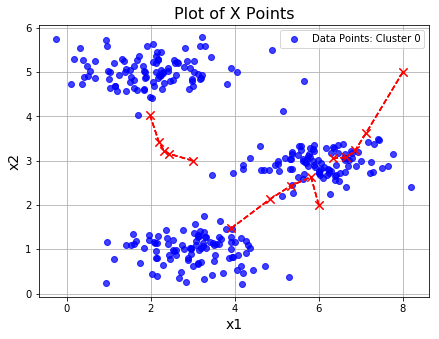

In [16]:
plot_data(X1, history ,myidxs = None)

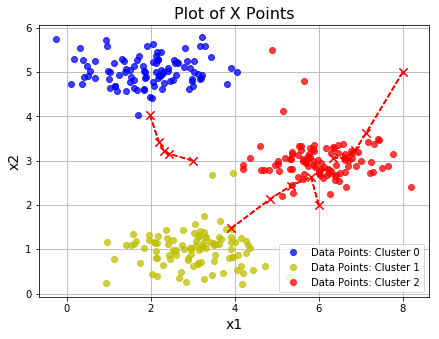

In [17]:
plot_data(X1, history ,myidxs = idx)

### Principal Component Analysis

In [44]:
data2 = loadmat("machine-learning-ex7/ex7/ex7data1.mat")
X2 = data2['X']
X2.shape

(50, 2)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X2)
normalized_X2 = scaler.transform(X2.copy())

In [56]:
from numpy.linalg import svd

In [57]:
U, S, V = svd(normalized_X2.T.dot(normalized_X2)/normalized_X2.shape[0], full_matrices = True, compute_uv = True)
print S

[ 1.73553038  0.26446962]


In [67]:
def plot_pca_data(X, normalized_X, U, S):
    plt.figure(figsize=(7,5))
    plot = plt.scatter(X[:,0], X[:,1], marker="x", color='b')
    plt.title("Example Dataset: PCA Eigenvectors Shown",fontsize=18)
    plt.xlabel('x1',fontsize=18)
    plt.ylabel('x2',fontsize=18)
    
    plt.plot([scaler.mean_[0], scaler.mean_[0] + 1.5*S[0]*U[0,0]], 
         [scaler.mean_[1], scaler.mean_[1] +1.5*S[0]*U[0,1]],
        color='red',label='First Principal Component')
    plt.plot([scaler.mean_[0], scaler.mean_[0] + 1.5*S[1]*U[1,0]], 
         [scaler.mean_[1], scaler.mean_[1] + 1.5*S[1]*U[1,1]],
        color='green', label='Second Principal Component')
    plt.legend(loc="best")

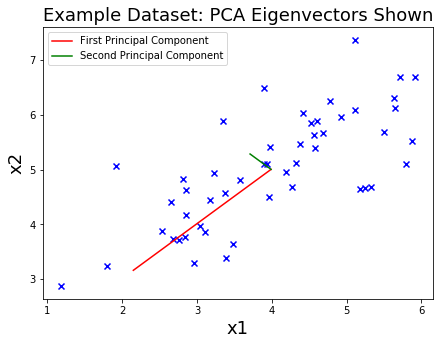

In [68]:
plot_pca_data(X2, normalized_X2, U, S)

### Dimensionality Reduction with PCA

In [69]:
def project_data(X, U, K):
    
    #Reduced U is the first "K" columns in U
    Ureduced = U[:,:K]
    z = X.dot(Ureduced)
    return z

In [ ]:
z = project_data(X_norm, U, 1)
print "the projection of first value onto the first dimesion is value %0.3f"%float(z[0])

In [78]:
def recover_data(z, U, K):
    Ureduced = U[:,:K]
    return z.dot(Ureduced.T)
X_rec = recover_data(z, U, 1)

### Visualize the projections

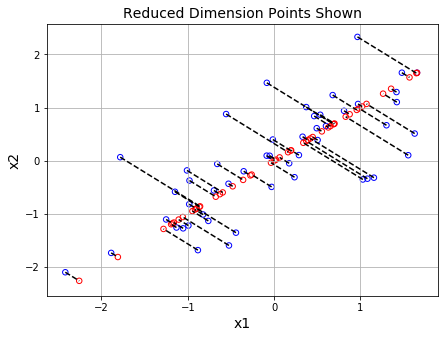

In [81]:
plt.figure(figsize=(7,5))
plot = plt.scatter(X_norm[:,0], X_norm[:,1], s=30, facecolors='none', 
                   edgecolors='b',label='Original Data Points')
plot = plt.scatter(X_rec[:,0], X_rec[:,1], s=30, facecolors='none', 
                   edgecolors='r',label='PCA Reduced Data Points')

plt.title("Reduced Dimension Points Shown",fontsize=14)
plt.xlabel('x1',fontsize=14)
plt.ylabel('x2',fontsize=14)
plt.grid(True)

for x in xrange(X_norm.shape[0]):
    plt.plot([X_norm[x,0],X_rec[x,0]],[X_norm[x,1],X_rec[x,1]],'k--')

### Face Image Dataset

In [105]:
data3 = loadmat("machine-learning-ex7/ex7/ex7faces.mat")
X3 = data3['X']
X3[1,1]

-0.86631386718750036

In [118]:
def get_image_data(row, w, h):
    """
    Function that is handed a single np array with shape 1x1032,
    crates an image object from it, and returns it
    """
    width, height = w, h
    square = row.reshape(width,height)
    return square.T

In [126]:
def plot_image_data(X, w, h, rows=10, cols=10):
    width, height = w, h
    nrows, ncols = rows, cols

    big_picture = np.zeros((height*nrows,width*ncols))
    
    irow, icol = 0, 0
    for idx in xrange(nrows*ncols):
        if icol == ncols:
            irow += 1
            icol= 0
        iimg = get_image_data(X[idx], width, height)
        big_picture[irow*height:irow*height+iimg.shape[0],icol*width:icol*width+iimg.shape[1]] = iimg
        icol += 1
    fig = plt.figure(figsize=(10,10))
    plt.imshow(big_picture, cmap='gray')

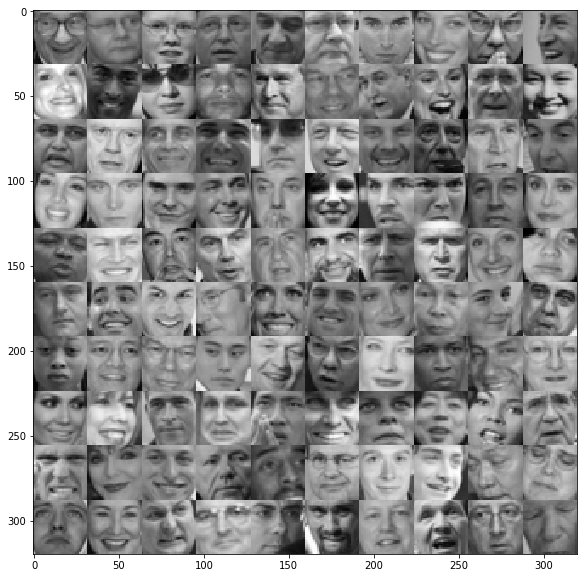

In [127]:
plot_image_data(X3, 32, 32)

In [128]:
X3_normalized = scaler.fit_transform(X3)


In [141]:
U, S, V = svd(X3_normalized.T.dot(X3_normalized)/X3_normalized.shape[0], full_matrices = True, compute_uv = True)
U.shape

(1024, 1024)

In [144]:
projected_X3 = project_data(X3_normalized, U, 100)
projected_X3.shape
recovered_X3 = recover_data(projected_X3, U, 100)

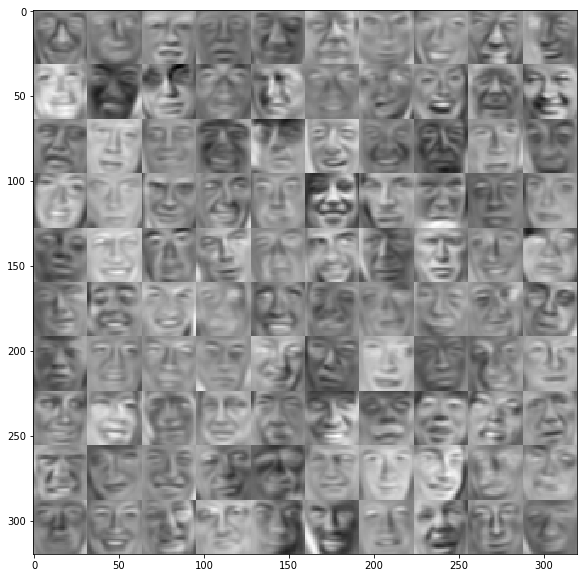

In [145]:
plot_image_data(recovered_X3, 32, 32)